Developement of Language Detection System using Machine Learning



In [1]:
#IMPORT LIBRARIES


import string
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, VotingClassifier



In [2]:
# Loading multiple datasets for usage more languages

df1 =pd.read_csv("C:\\Users\\abhis\\Desktop\\PROJ_DOCS\\dataset.csv")
df2 = pd.read_csv("C:\\Users\\abhis\\Desktop\\PROJ_DOCS\\Language Detection.csv")


In [5]:
# Concatenate  datasets
# Save the combined dataset

df= pd.concat([df1, df2], ignore_index=True)
df.to_csv('df', index=False)


In [11]:
# Display newly created DataFrame

df

,Text,Language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
32332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
32333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
32334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
32335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [13]:
# Display rows and columns in DATAFRAME
df.shape

(32337, 2)

In [14]:
# Display Languages and their row numbers 

df["Language"].value_counts()

Language
English       2385
French        2014
Spanish       1819
Russian       1692
Dutch         1546
Arabic        1536
Turkish       1474
Tamil         1469
Hindi         1063
Urdu          1000
Japanese      1000
Thai          1000
Swedish       1000
Estonian      1000
Korean        1000
Chinese       1000
Portugese     1000
Indonesian    1000
Latin         1000
Pushto        1000
Persian       1000
Romanian      1000
Portugeese     739
Italian        698
Sweedish       676
Malayalam      594
German         470
Danish         428
Kannada        369
Greek          365
Name: count, dtype: int64

In [15]:
# Checking null values 

print(df['Text'].isnull().sum())  # Check for NaN values


0


In [17]:
# method to remove puncutations for easy predication

def remove_pun(Text):
    if isinstance(Text, str):
        for pun in string.punctuation:
            Text = Text.replace(pun, "")
        Text = Text.lower()
    return Text

In [18]:
#Applying the remove_pun function to the 'Text' column of your DataFrame df

df['Text'] = df['Text'].apply(remove_pun)

In [19]:
# Assigning depenndent and independent values for X and Y 

X=df.iloc[:,0]  #X is assigned as Text column
y=df.iloc[:,1]   #Y is assigned as Language column

In [22]:
# Show X values
X

0        klement gottwaldi surnukeha palsameeriti ning ...
1        sebes joseph pereira thomas  på eng the jesuit...
2        ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...
3        விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
4        de spons behoort tot het geslacht haliclona en...
                               ...                        
32332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
32333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
32334    ಹೇಗೆ  ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ...
32335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
32336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 32337, dtype: object

In [23]:
# Display y values
y

0        Estonian
1         Swedish
2            Thai
3           Tamil
4           Dutch
           ...   
32332     Kannada
32333     Kannada
32334     Kannada
32335     Kannada
32336     Kannada
Name: Language, Length: 32337, dtype: object

In [24]:
# Spliting the data 
# 25% data is given for testing and remaining 75% is given for training

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [25]:
# Display X_train values after splitting and applying random state=42

X_train

13427    چنانچہ آنحضرتﷺ کے بعد جب ارتداد کا فتنہ اٹھا ت...
18134    lévolution du nombre dhabitants est connue à t...
14970    organisatsioon asutati  detsembril  tartu ülik...
13307    년 월 일 미국 미주리주 세인트루이스 스캇트레이드 센터에서 열린  서바이버 시리즈 ...
30826                               vad tycker du om detta
                               ...                        
29802               terrence ha preso il pianto e infelice
5390     doğu kanada atabasklarına geleneksel olarak dü...
860      پژواک د يوې ځانگړې پروژې په توگه د اساسي قانون...
15795    テンサイについては糖分を高度に精製する必要があることからサトウキビと同じような黒糖を作るのは...
23654    അക്യൂട്ട് ആംഗിൾ 90 ഡിഗ്രിയിൽ കുറവുള്ള ഈ മൂർച്ച...
Name: Text, Length: 24252, dtype: object

In [26]:
# Initializes a TF-IDF vectorizer using character n-grams (1 to 2 characters) to capture language patterns.
# Define the vectorizer


vec = TfidfVectorizer(ngram_range=(1, 2), analyzer='char')


In [27]:
vec

TfidfVectorizer(analyzer='char', ngram_range=(1, 2))

In [28]:
print(vec.get_params())


{'analyzer': 'char', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.float64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 1.0, 'max_features': None, 'min_df': 1, 'ngram_range': (1, 2), 'norm': 'l2', 'preprocessor': None, 'smooth_idf': True, 'stop_words': None, 'strip_accents': None, 'sublinear_tf': False, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'use_idf': True, 'vocabulary': None}


In [29]:
# Fit and transform the data 

Tfid_Matrix =vec.fit_transform(X)

In [32]:
## Display the shape of the resulting TF-IDF matrix
Tfid_Matrix.shape

(32337, 176519)

In [33]:
# Printing the feature names
vec.get_feature_names_out()

array(['\n', '\n1', '\n2', ..., '𢙯 ', '𧣾', '𧣾俞'], dtype=object)

In [34]:
# X_train elements are converted to strings including numbers etc 

X_train = X_train.astype(str)

In [36]:

# Define individual models

random_forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
naive_bayes = MultinomialNB()

In [37]:
# Create a voting classifier with these models

voting_clf = VotingClassifier(
    estimators=[
        ('rf', random_forest),
        ('svm', svm),
        ('nb', naive_bayes)
    ],
    voting='soft'  # Use 'soft' voting to consider predicted probabilities
)

In [38]:
# Create the pipeline

model_pipe = Pipeline([
    ('vec', vec),  # Vectorize the input data using TF-IDF
    ('voting_clf', voting_clf)  # Combine models using VotingClassifier
])


In [39]:
# Fit the pipeline on the training data
model_pipe.fit(X_train, y_train)


Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('voting_clf',
                 VotingClassifier(estimators=[('rf',
                                               RandomForestClassifier(n_jobs=-1,
                                                                      random_state=42)),
                                              ('svm',
                                               SVC(kernel='linear',
                                                   probability=True,
                                                   random_state=42)),
                                              ('nb', MultinomialNB())],
                                  voting='soft'))])

In [40]:
# Make predictions on the test data
y_pred = model_pipe.predict(X_test)


In [41]:
# Evaluate the performance

accuracy = accuracy_score(y_test, y_pred)*100
print("Test Accuracy:", accuracy)

Test Accuracy: 96.82127396413111


In [42]:
confusion_matrix(y_test,y_pred)

array([[374,   0,   0,   0,   1,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0, 262,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  1,   0,  76,   1,   6,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  1,   0,   0, 384,  12,   0,   1,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0, 599,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,  12, 226,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,

For Testing purpose 

In [43]:
model_pipe.predict(['இவர்கள் போர் நடவடிக்கைகளில்']) #Tamil

array(['Tamil'], dtype=object)

In [44]:
model_pipe.predict(['The quick brown fox jumps over the lazy dog.'])  # English


array(['English'], dtype=object)

In [45]:
model_pipe.predict(['El rápido zorro marrón salta sobre el perro perezoso.'])  # Spanish


array(['Spanish'], dtype=object)

In [46]:
model_pipe.predict(['Le renard brun rapide saute par-dessus le chien paresseux.'])  # French


array(['French'], dtype=object)

In [47]:
model_pipe.predict(['Der schnelle, braune Fuchs springt über den faulen Hund.'])  # German


array(['German'], dtype=object)

In [48]:
model_pipe.predict(['敏捷的棕色狐狸跳过懒狗。'])  # Chinese


array(['Chinese'], dtype=object)

In [49]:
model_pipe.predict(['速い茶色のキツネが怠惰な犬を飛び越えます。'])  # Japanese


array(['Japanese'], dtype=object)

In [50]:
model_pipe.predict(['빠른 갈색 여우가 게으른 개를 넘습니다.'])  # Korean


array(['Korean'], dtype=object)

In [51]:
model_pipe.predict(['Быстрая коричневая лиса перепрыгивает через ленивую собаку.'])  # Russian


array(['Russian'], dtype=object)

In [52]:
model_pipe.predict(['الثعلب البني السريع يقفز فوق الكلب الكسول.'])  # Arabic


array(['Arabic'], dtype=object)

In [53]:
model_pipe.predict(['तेज़ भूरे रंग की गीदड़ आलसी कुत्ते के ऊपर कूद जाता है।'])  # Hindi


array(['Hindi'], dtype=object)

In [54]:
model_pipe.predict(['A rápida raposa marrom pula sobre o cachorro preguiçoso.'])  # Portuguese


array(['Portugeese'], dtype=object)

In [55]:
model_pipe.predict(['La veloce volpe marrone salta sopra il cane pigro.'])  # Italian


array(['Italian'], dtype=object)

In [57]:
model_pipe.predict(['Hızlı kahverengi tilki tembel köpeğin üzerinden atlıyor.'])  # Turkish


array(['Turkish'], dtype=object)

In [58]:
model_pipe.predict(['Den snabba bruna räven hoppar över den lata hunden.'])  # Swedish


array(['Sweedish'], dtype=object)

In [59]:
model_pipe.predict(['Den hurtige brune ræv hopper over den dovne hund.'])  # Danish


array(['Danish'], dtype=object)

In [61]:
model_pipe.predict(['Szybki brązowy lis przeskakuje nad leniwym psem.'])  # Polish


array(['English'], dtype=object)

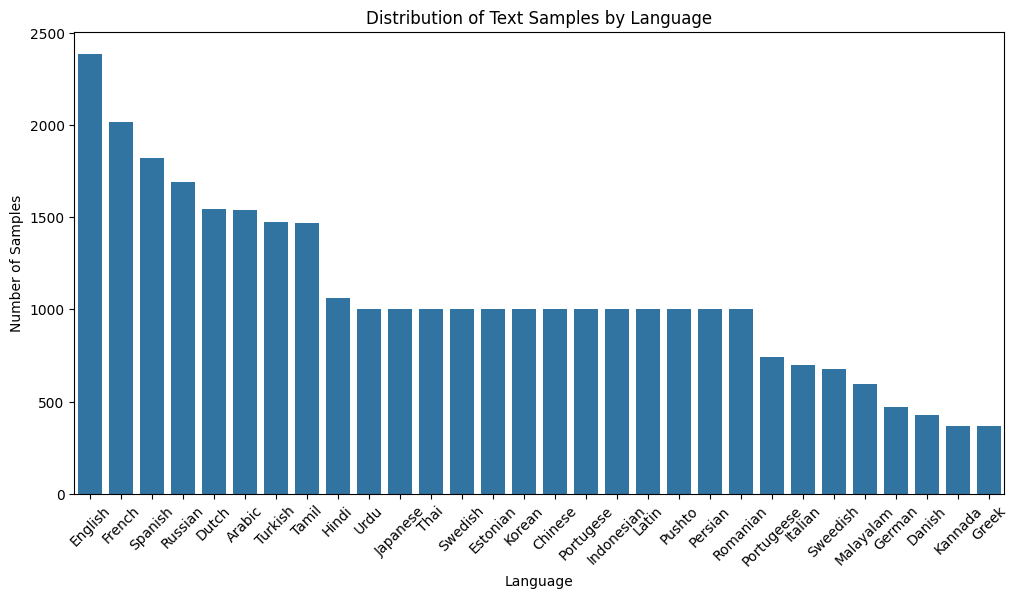

In [62]:
# Plot the distribution of text samples by language
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Language', order=df['Language'].value_counts().index)
plt.title('Distribution of Text Samples by Language')
plt.xlabel('Language')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()
